In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(image):
    if len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[-1] == 1):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Wyrównanie histogramu

Głównym jej celem jest poprawa histogramu na obrazie, w celu poszerzenia zakresu intensywności.

Opiera się ona na histogramie obrazu - czyli opisie rozkładu wartości w poszczególnych pikselach w obrazie.

## Jak to działa?

Wyrównanie histogramu polega na rzutowaniu danego histogramu na inny rozkład (szerszy i bardziej równomiernie rozłożony, tak że wartości intensywności są rozłożone po całym przedziale. Wykorzystujemy w tym celu funkcję `cv2.equalizeHist()`.

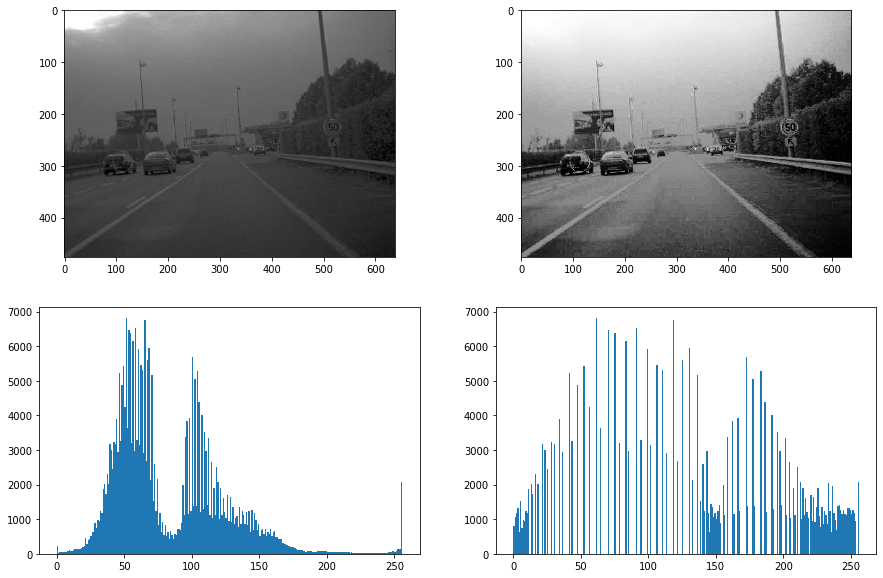

In [90]:
image = cv2.imread('agh_cv/road.png', 0)
plt.subplot(221)
imshow(image)

plt.subplot(223)
plt.hist(image.ravel(), bins=256, range=[0, 256])

plt.subplot(222)
equalized = cv2.equalizeHist(image)
imshow(equalized)

plt.subplot(224)
plt.hist(equalized.ravel(), bins=256, range=[0, 256])
plt.show()

## Metoda CLAHE

*Contrast Limited Adaptive Histogram Equalization*, czyli adaptacyjna metoda wyrównania histogramu. Opiera się ona ograniczaniu wysokich wartości na histogramie (dla lokalnych obszarów - jak w adaptacyjnym progowaniu) i ich redystrybucję, zgodnie z rysunkiem:
![obraz](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Clahe-redist.svg/600px-Clahe-redist.svg.png)

W OpenCV wykorzystujemy w tym celu funkcję `cv2.createCLAHE()`, która przyjmuje parametry `clipLimit`, czyli wartość progu do limitowania kontrastu, a `tileGridSize` mówi o wielkości pojedynczych fragmentów, w których wyrównywany jest histogram.

<function matplotlib.pyplot.show(*args, **kw)>

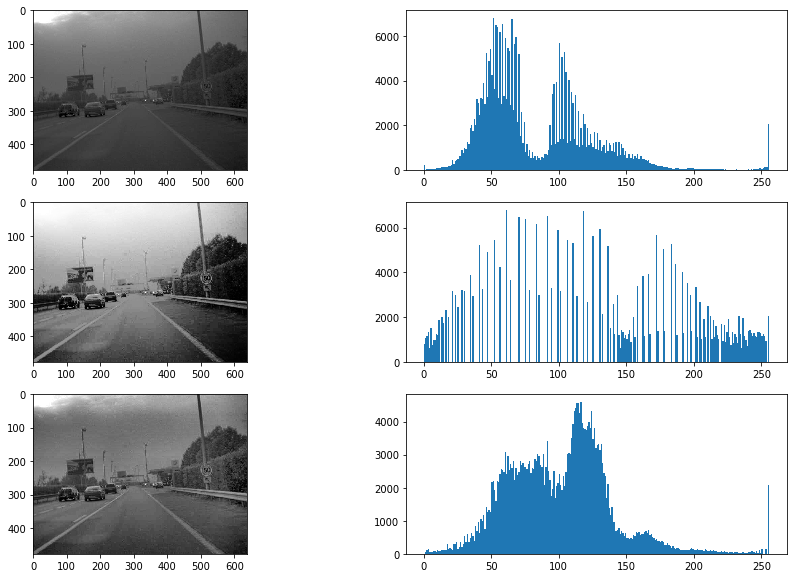

In [93]:
plt.subplot(321)
imshow(image)

plt.subplot(322)
plt.hist(image.ravel(), bins=256, range=[0, 256])

plt.subplot(323)
equalized = cv2.equalizeHist(image)
imshow(equalized)

plt.subplot(324)
plt.hist(equalized.ravel(), bins=256, range=[0, 256])

plt.subplot(325)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
equalized_clahe = clahe.apply(image)
imshow(equalized_clahe)

plt.subplot(326)
plt.hist(equalized_clahe.ravel(), bins=256, range=[0, 256])
plt.show

W przypadku obrazów kolorowych najczęściej stosuje się przejście do innej przestrzeni barwowej (np. LAB), a wyrównanie histogramu stosuje się tylko dla składowej L (jasność).

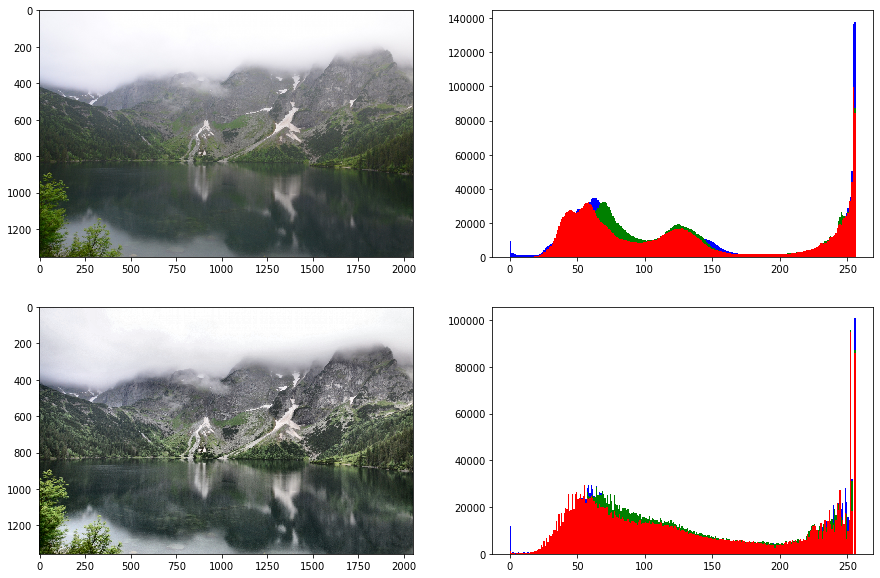

In [97]:
image = cv2.imread('agh_cv/gory_lc.jpg')

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8, 8))
lab[..., 0] = clahe.apply(lab[..., 0])
equalized = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

plt.subplot(221)
imshow(image)
plt.subplot(222)
plt.hist(image[..., 0].ravel(), bins=256, range=[0, 256], color='b')
plt.hist(image[..., 1].ravel(), bins=256, range=[0, 256], color='g')
plt.hist(image[..., 2].ravel(), bins=256, range=[0, 256], color='r')
plt.subplot(223)
imshow(equalized)
plt.subplot(224)
plt.hist(equalized[..., 0].ravel(), bins=256, range=[0, 256], color='b')
plt.hist(equalized[..., 1].ravel(), bins=256, range=[0, 256], color='g')
plt.hist(equalized[..., 2].ravel(), bins=256, range=[0, 256], color='r')
plt.show()

# Wygładzanie obrazów

## Cele

- Rozmyty obraz z różnymi filtrami
- Zastosowanie niestandardowych filtrów do obrazów (konwolucja 2D)

## 2D Convolution
OpenCV udostępnia funkcję, `cv2.filter2D()`, która wykonuje funkcję splotu filtra z obrazem. Jako przykład, wypróbujemy filtr uśredniający na obrazie. Filtr uśredniający 5x5 można zdefiniować w następujący sposób:

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
(378, 428, 3)
(378, 428, 3)


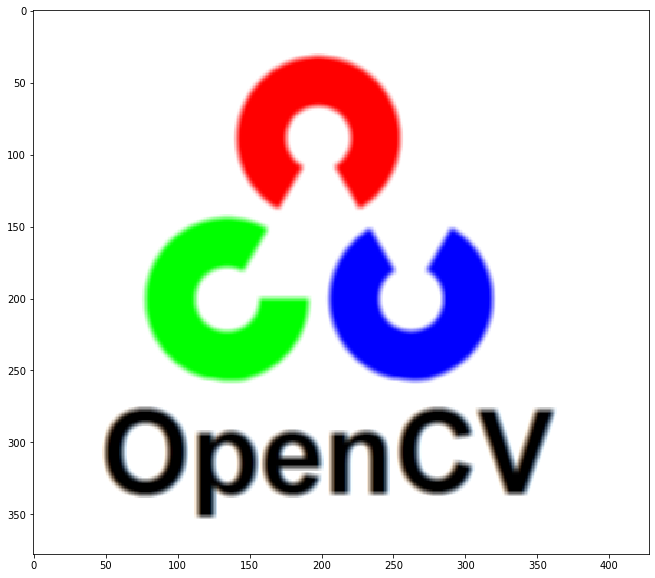

In [16]:
plt.rcParams['figure.figsize'] = [15, 10]

size = 5
kernel = 1 / size**2 * np.ones((size, size))
print(kernel)

img = cv2.imread('images/opencv_logo.png')
print(img.shape)
output = cv2.filter2D(img, cv2.CV_8U, kernel)
print(output.shape)
imshow(output)

## Rozmycie obrazu

Rozmycie obrazu uzyskuje się przez operację konwolucji przy użyciu odpowiedniego filtra. Jest to przydatne przy usuwaniu szumów. W rzeczywistości usuwa z obrazu treść o wysokiej częstotliwości (np.: szumy, krawędzie), co powoduje rozmycie brzegów po zastosowaniu filtra. OpenCV oferuje głównie cztery rodzaje technik rozmycia.

### 1. Uśrednianie
Odbywa się to poprzez operację konwolucji za pomocą _znormalizowanego filtra_ ( _normalized box filter_ ). Pobiera on po prostu średnią wszystkich pikseli znajdujących się pod obszarem filtra i zastępuje centralny element tą średnią. Odbywa się to za pomocą funkcji `cv2.blur()`. Tak wyglądałby filtr rozmywający 3x3:

$$\begin{equation}
K=\frac{1}{9}\left[\begin{array}{lll}{1} & {1} & {1} \\ {1} & {1} & {1} \\ {1} & {1} & {1}\end{array}\right]
\end{equation}$$


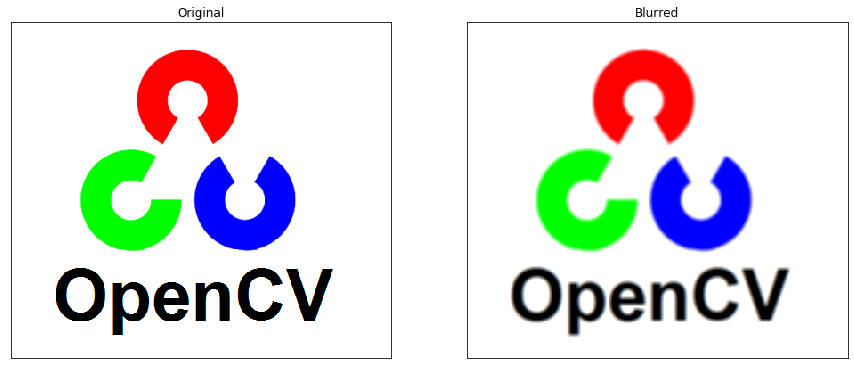

In [76]:
img = cv2.imread('agh_cv/opencv_logo.png')

blur = cv2.blur(img, (5,5))

plt.subplot(121), imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 2. Filtrowanie gaussowskie

W tym podejściu, zamiast filtra _box filter_ składającego się z jednakowych współczynników filtracji, stosuje się filtr gaussowski. Odbywa się to za pomocą funkcji `cv2.GaussianBlur()`. Trzeba w niej podać wymiary kernela - wymiar ten musi być dodatni i nieparzysty.

Powinniśmy również określić odchylenie standardowe w kierunkach X i Y, odpowiednio `sigmaX` i `sigmaY`. Jeśli podano tylko sigmaX, sigmaY jest rozumiane jako równe `sigmaX`. 

Jeśli oba podane są jako zera, to wówczas są one obliczane na podstawie wielkości filtra. Filtrowanie gaussowskie jest bardzo skuteczne w usuwaniu szumów gaussowskich z obrazu.

Możliwe jest również ręczne utworzenie filtra gaussowskiego z użyciem `cv2.getGaussianKernel()`.

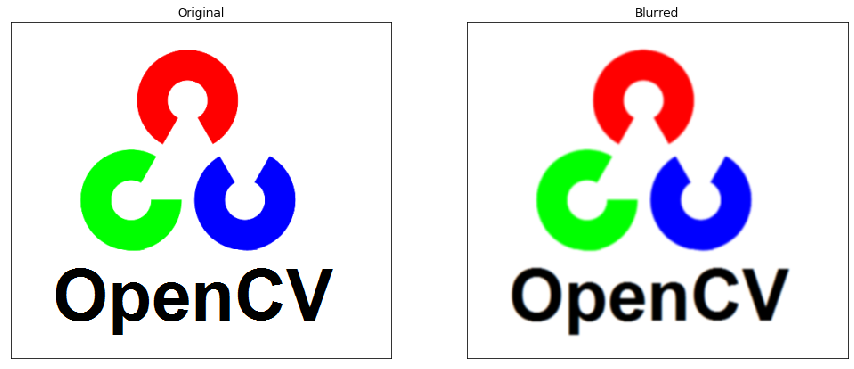

In [75]:
img = cv2.imread('agh_cv/opencv_logo.png')

blur = cv2.GaussianBlur(img,(5,5), 0)

plt.subplot(121), imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 3. Filtrowanie bilateralne

Jest to inna metoda wygładzania obrazu. Jej interesującą cechą jest zdolność do usuwania szumu z obrazu przy jednoczesnym zachowaniu ostrych, wyraźnych krawędzi. Jego działanie polega na zastępowaniu wartości w każdym pikselu przez ważoną wartość przylegających pikseli.

Funkcja `cv2.bilateralFilter()` oprócz obrazu przyjmuje parametry: `d` mówiący o średnicy analizowanego otoczenia (wielkość filtra - im większy, tym wolniejszy), `sigmaColor` i `sigmaSpace` mówią o stopniu, w jakim sąsiednie piksele wpływają na siebie przy wygładzaniu (dla pierwszego: większa wartość sprawi, że mieszane będą bardziej odległe od siebie kolory; dla drugiego - bardziej odległe piksele).

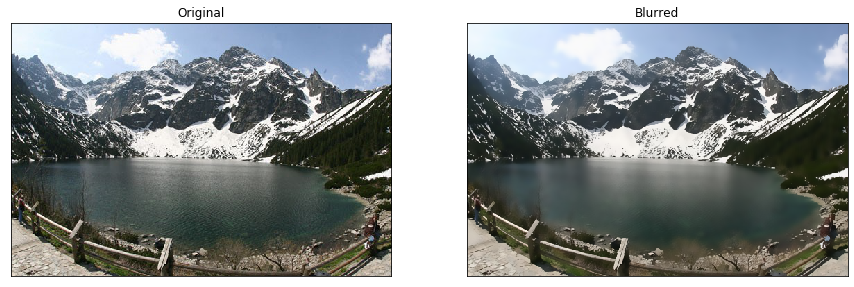

In [84]:
img = cv2.imread('agh_cv/gory.jpg')

blur = cv2.bilateralFilter(img,
                          d=11,
                          sigmaColor=60,
                          sigmaSpace=60)

plt.subplot(121), imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Wykrywanie krawędzi

Głównym celem wykrywania krawędzi jest zamiana obrazu w skali szarości lub binarnego (uzyskanego np. w wyniku progowania) na obraz zawierający tylko krawędzie.

Istnieje wiele różnych metod wykrywania krawędzi. Postaramy się porównać dwie najpopularniejsze spośród nich - operator Sobela oraz algorytm detekcji krawędzi Canny. *(Są jeszcze operatory Prewitta i Laplasjan, ale o nich innym razem :) )*

## 1. Operator Sobela

Operator Sobela bazuje na operacji splotu obrazu z małym filtrem o wymiarach 3x3. Filtry mają różną postać w zależności od kąta krawędzi, które mają wykrywać. Przykładowe postaci filtrów przedstawione zostały poniżej:

$$S_{0^{\circ}} = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1\end{bmatrix}$$

$$S_{45^{\circ}} = \begin{bmatrix} 0 & +1 & +2 \\ -1 & 0 & +1 \\ -2 & -1 & 0\end{bmatrix}$$

$$S_{90^{\circ}} = \begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

$$S_{135^{\circ}} = \begin{bmatrix} +2 & +1 & 0 \\ +1 & 0 & -1 \\ 0 & -1 & -2\end{bmatrix}$$

Dla kierunku 0 stopni wykrywane są krawędzie pionowe, dla kierunku 90 - krawędzie poziome. Otrzymane wartości pochodnych cząstkowych definiują wektor gradientu dla każdego punktu obrazu.

Operator Sobela dokonuje _de facto_ operacji uśredniania pochodnej z trzech linii równoległych do kierunku różniczkowania. Dodatkowo łączy on w sobie wygładzanie gaussowskie, dzięki czemu może być bardziej odporny na szumy.

W OpenCV wykorzystywać będziemy funkcję `cv2.Sobel()`, która dokonuje przektształcenia obrazu poprzez splot z filtrem Sobela. Oprócz obrazu źródłowego wymaga on podania głebi obrazu (ważne! dla źle dobranej głębi operator nie będzie działał poprawnie) oraz wartości reprezentujących kierunek działania filtra (`dx` oraz `dy`).

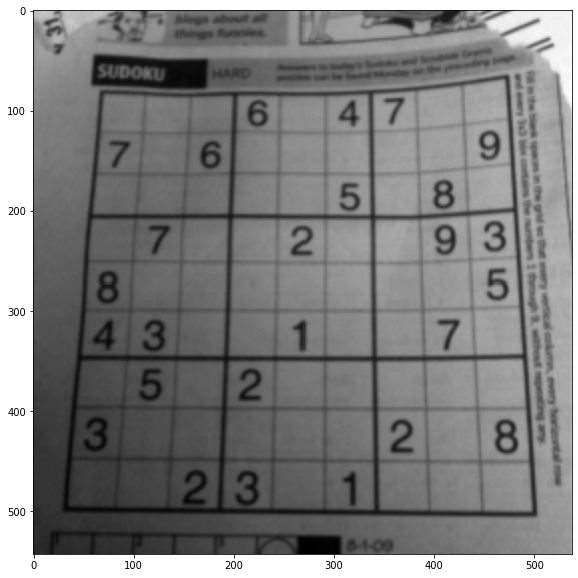

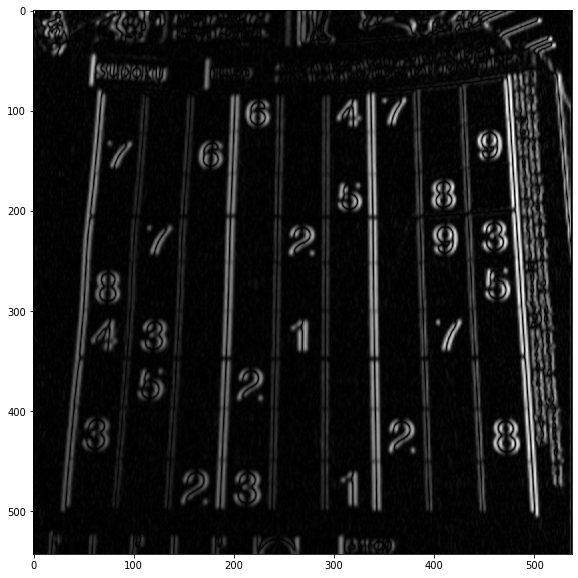

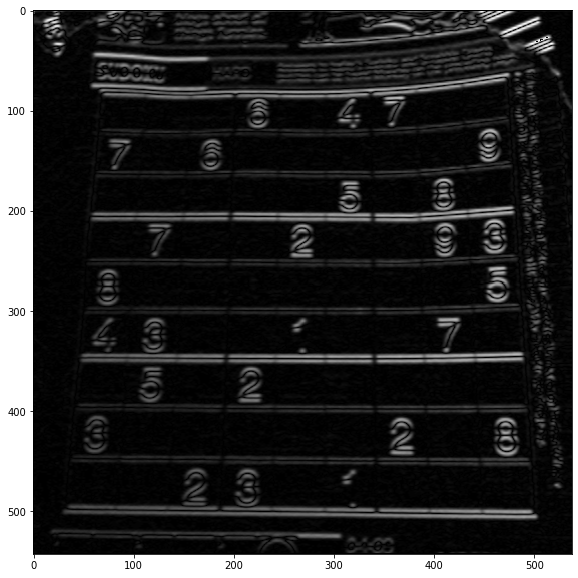

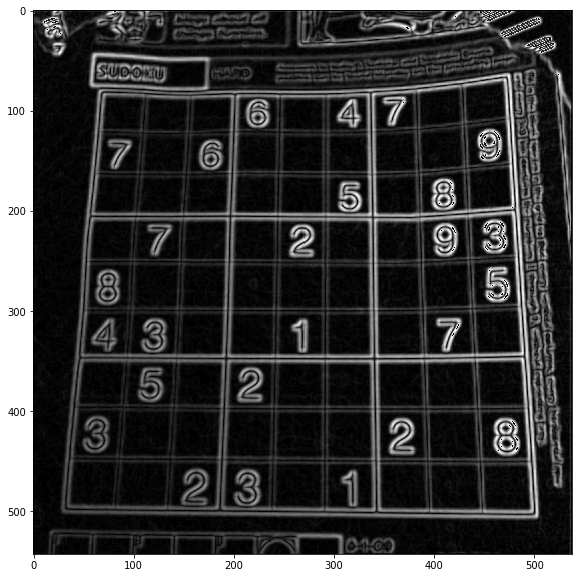

In [59]:
image = cv2.imread('agh_cv/sudoku2.png', 0)
imshow(image)
plt.show()

# musi być CV_64F - wysoka dokładność; dla niższej działa niepoprawnie
# przykładowo - dla CV_8U nie da rady wykryć przejścia biały -> czarny

# Sobel w poziomie
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)  
horizontal = np.absolute(sobel_x).astype(np.uint8)
imshow(horizontal)
plt.show()

# Sobel w pionie
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)
vertical = np.absolute(sobel_y).astype(np.uint8)
imshow(vertical)
plt.show()

# suma
imshow(horizontal + vertical)

W przypadku operatora Sobela często dodatkowo wykorzystuje się rozmycie, którego zadaniem jest złagodzenie wpływu szumów.

## Operator Canny

Metoda detekcji krawędzi Canny jest prawdopodobnie jedną z najpopularniejszych i najczęściej wykorzystywanych metod detekcji krawędzi. Jest to algorytm wieloetapowy:

1. Wygładź obraz używając filtra gaussowskiego
1. Oblicz gradienty używając operatory Sobela
1. Znajdź krawędzie (*non-maximum suppression* - usuwanie niemaksymalnych gradientów - zachowujemy tylko te gradienty, które mają odpowiednio dużą wartość w stosunku do swojego otoczenia)
1. Łączenie i progowanie krawędzi (histereza - łączenie pojedynczych fragmentów krawędzi w długą całość)

W OpenCV wykorzystujemy w tym celu funkcję `cv2.Canny()`. Oprócz analizowanego obrazu przyjmuje ona parametry `threshold1` i `threshold2` mówiące o progach histerezy, a także `appertureSize` mówiący o wielkości filtra Sobela.

In [62]:
from ipywidgets import interact

def canny(threshold_1, threshold_2):
    imshow(cv2.Canny(image, threshold_1, threshold_2, 3))

interact(canny, threshold_1=range(0, 256),
         threshold_2=range(0, 256))

# niezłe wyniki dla threshold_1=16, threshold_2=40, ale można stroić dalej!

interactive(children=(Dropdown(description='threshold_1', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

<function __main__.canny(threshold_1, threshold_2)>

## Zadanie

Wczytaj obrazek `agh_cv/agh_tekst.png`. Porównaj działanie:
- rozmycia z użyciem wybranej metody (uśrednianie lub gaussowskie) oraz wykrywania krawędzi dwoma filtrami Sobela
- algorytmu Canny

Spróbuj dostroić podane algorytmy by uzyskać jak najlepsze rezultaty. Czy wyrównanie histogramu może w czymś pomóc tutaj?

In [68]:
image = cv2.imread('agh_cv/agh_tekst.jpg', 0)

def gauss_sobel(size):
    blur = cv2.GaussianBlur(image, (size,size), 0)
    # Sobel w poziomie
    sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0)  
    horizontal = np.absolute(sobel_x).astype(np.uint8)

    # Sobel w pionie
    sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1)
    vertical = np.absolute(sobel_y).astype(np.uint8)

    # suma
    imshow(horizontal + vertical)
    
interact(gauss_sobel, size=range(3, 51, 2))

interactive(children=(Dropdown(description='size', options=(3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29…

<function __main__.gauss_sobel(size)>

In [69]:
def canny(threshold_1, threshold_2):
    imshow(cv2.Canny(image, threshold_1, threshold_2, 3))

interact(canny, threshold_1=range(0, 256),
         threshold_2=range(0, 256))

interactive(children=(Dropdown(description='threshold_1', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

<function __main__.canny(threshold_1, threshold_2)>

# Wykrywanie konturów

Zadanie wykrywania konturów polega na określaniu położenia różnego rodzaju kształtów na obrazie. Często opiera się ono na transformacji Hougha.

## Transformacja Hougha do wykrywania linii

W swojej podstawowej wersji jest to algorytm do wykrywania prostych linii. Polega ona na reprezentacji prostych w tzw. przestrzeni Hougha - każda prosta może być tam jednoznacznie przedstawiona za pomocą kąta nachylenia $\theta$ oraz odległości od początku układu współrzędnych $\rho$.
![obraz](https://upload.wikimedia.org/wikipedia/commons/8/87/Rectas.jpg)

Wykrywanie linii opiera się na głosowaniu - każdy piksel w obrazie źródłowym (po wykrywaniu krawędzi) głosuje na wszystkie proste przechodzące przez ten piksel. Wynikowy zbiór prostych (przycinanych do odcinków) zawiera maksima, reprezentujące proste wykryte w oryginalnym obrazie.

Zastosujmy taką transformację do wykrywania linii w przykładowym obrazie.

W bibliotece OpenCV mamy dwie metody do tego typu transformacji. `HoughLines` to standardowa transformacja Hougha, natomiast `HoughLinesP` to jej bardziej efektywna implementacja (probabilistyczna). Druga z nich, oprócz obrazu przyjmuje parametry: `rho`, czyli rozdzielczość kontenerów na linie (w pikselach), `theta`, czyli rozdzielczość kątu w radianach, `threshold` czyli próg liczby głosów, poniżej których wykryte linie są odrzucane, `minLineLength` - minimalna długość linii oraz `maxLineGap` - maksymalna dopuszczalna odległość pomiędzy liniami (gdy dopuszczalne jest ich połączenie).

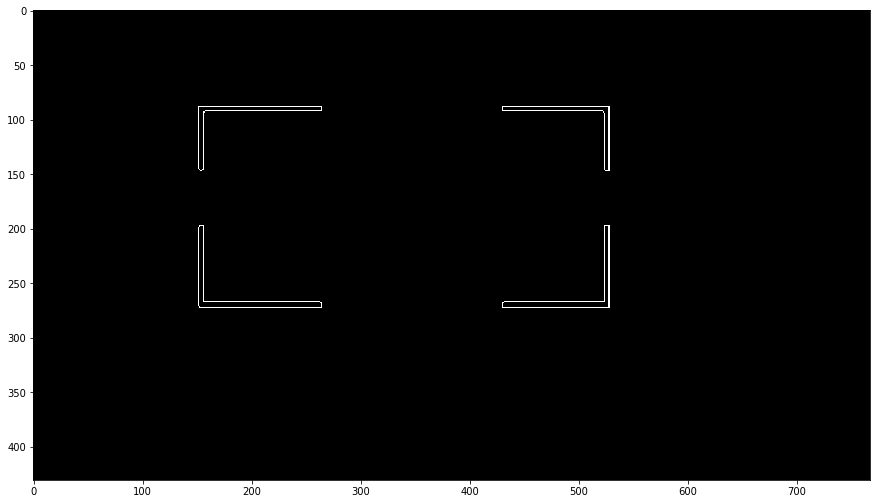

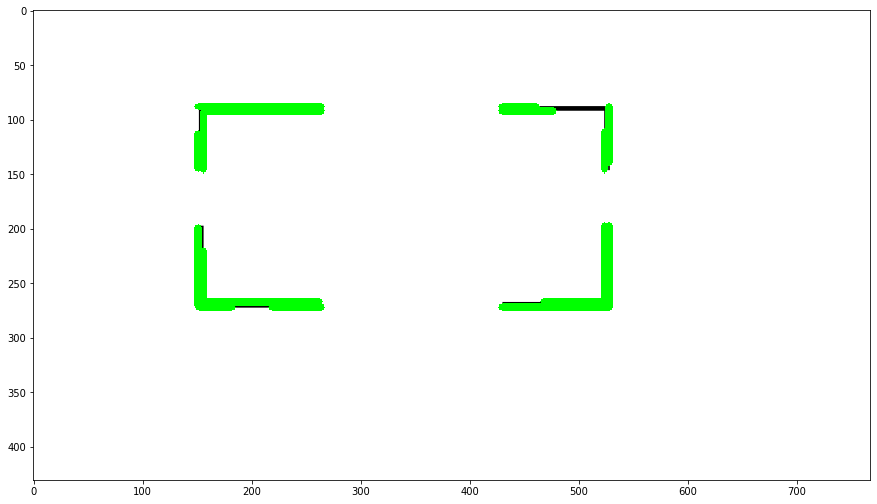

In [105]:
image = cv2.imread('agh_cv/lines.png', 0)
edges = cv2.Canny(image, 16, 40, 3)
imshow(edges)
plt.show()
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50) # co będzie dla maxLineGap=250?
result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 5)
imshow(result)

## Zadanie

Spróbuj wykonać wykrywanie linii brzegowej na zdjęciu `agh_cv/brzeg.jpeg`. Wykorzystaj wyrównanie histogramu, wybraną metodę detekcji krawędzi oraz odpowiednio dostrojoną metodę detekcji linii. Wynikowym obrazem ma być obraz wejścowy wraz z zaznaczonym na czerwono brzegiem.

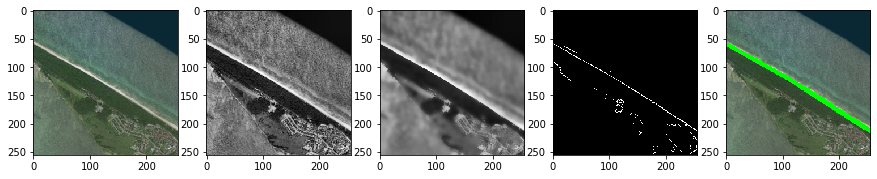

In [117]:
image = cv2.imread('agh_cv/brzeg.jpeg')
plt.subplot(151)
imshow(image)
# skala szarości
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# clahe
plt.subplot(152)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
equalized_clahe = clahe.apply(gray)
imshow(equalized_clahe)
# rozmycie
plt.subplot(153)
blur = cv2.bilateralFilter(equalized_clahe,
                          d=11,
                          sigmaColor=60,
                          sigmaSpace=60)
imshow(blur)
# canny
plt.subplot(154)
edges = cv2.Canny(blur, 240, 250, 3)
imshow(edges)
plt.subplot(155)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50, minLineLength=50)
result = image.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 5)
imshow(result)